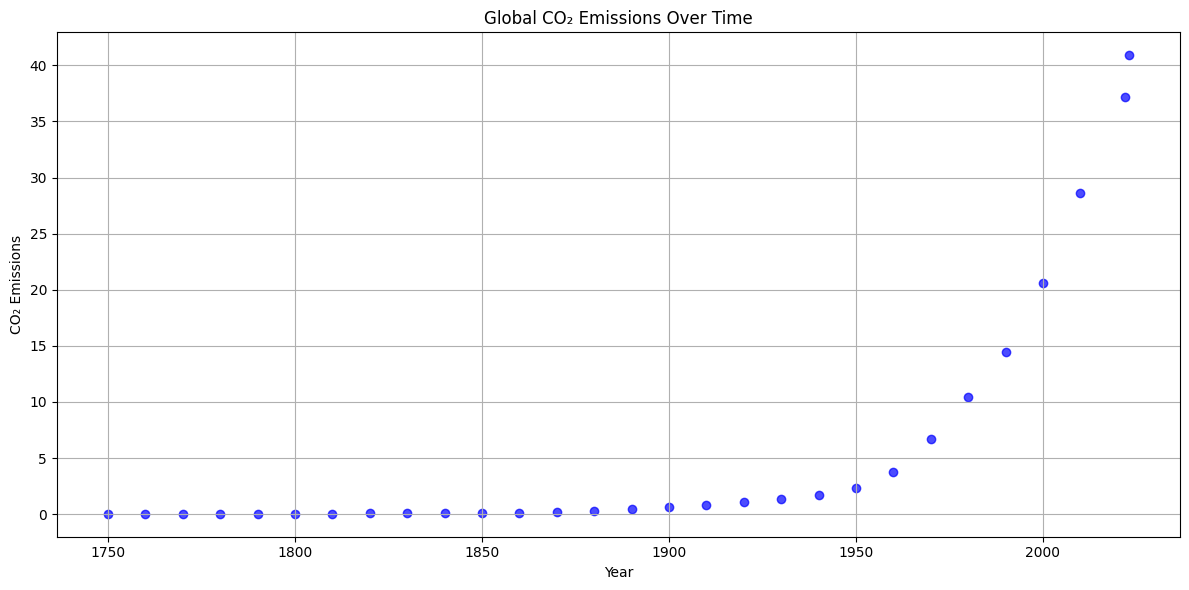

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "C:/Projects/Capstone/CO2-Emissions-and-Global-Temperature-Analysis/Data/Cleaned/GlobalCO2Emissions.xlsx"
df = pd.read_excel(file_path)

# Ensure numeric types and drop NaNs
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Emissions"] = pd.to_numeric(df["Emissions"], errors="coerce")
df = df.dropna(subset=["Year", "Emissions"]).sort_values("Year")

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(df["Year"], df["Emissions"], alpha=0.7, color="blue")

plt.title("Global CO₂ Emissions Over Time")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions")
plt.grid(True)
plt.tight_layout()
plt.show()


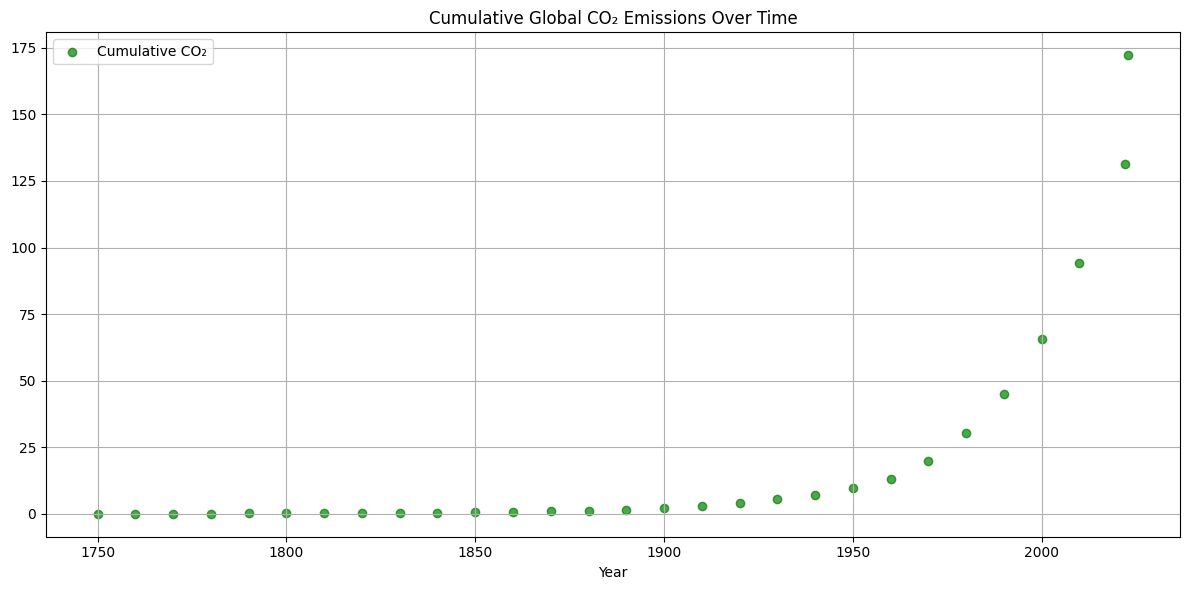

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "C:/Projects/Capstone/CO2-Emissions-and-Global-Temperature-Analysis/Data/Cleaned/GlobalCO2Emissions.xlsx"
df = pd.read_excel(file_path)

# Ensure numeric and drop NaNs
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Emissions"] = pd.to_numeric(df["Emissions"], errors="coerce")
df = df.dropna(subset=["Year", "Emissions"]).sort_values("Year")

# Compute cumulative emissions
df["CumulativeEmissions"] = df["Emissions"].cumsum()

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(df["Year"], df["CumulativeEmissions"],
            alpha=0.7, color="green", label="Cumulative CO₂")

plt.title("Cumulative Global CO₂ Emissions Over Time")
plt.xlabel("Year")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


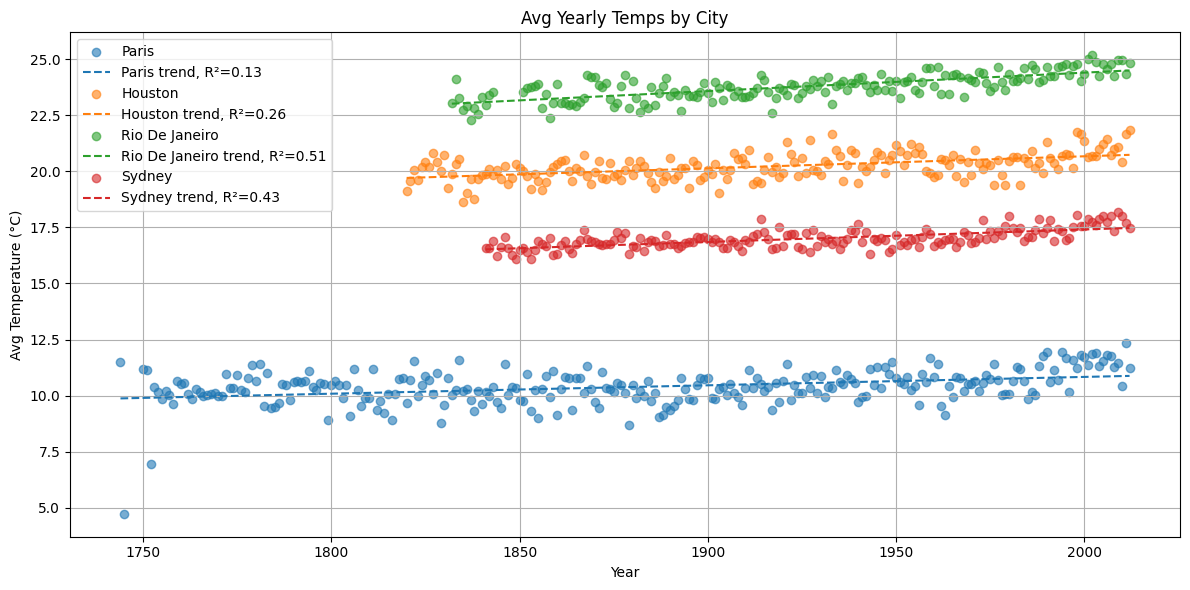

In [5]:
import numpy as np
from scipy.stats import linregress

# Load temperature data
file_path = "C:/Projects/Capstone/CO2-Emissions-and-Global-Temperature-Analysis/Data/Cleaned/Avg_Yearly_Temps.xlsx"
df = pd.read_excel(file_path)

# Convert and clean
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["AvgTemp"] = pd.to_numeric(df["AvgTemp"], errors="coerce")
df = df.dropna(subset=["Year", "AvgTemp"])

# Define your cities
cities = ["Paris", "Houston", "Rio De Janeiro", "Sydney"]

plt.figure(figsize=(12, 6))
for city in cities:
    city_df = df[df["City"] == city].sort_values("Year")
    x = city_df["Year"]
    y = city_df["AvgTemp"]

    # Scatter only
    plt.scatter(x, y, alpha=0.6, label=city)

    # Optional: add a simple linear trendline (skip if truly no trend needed)
    slope, intercept, r, p, _ = linregress(x, y)
    plt.plot(x, intercept + slope * x, "--", label=f"{city} trend, R²={r**2:.2f}")

plt.title("Avg Yearly Temps by City")
plt.xlabel("Year")
plt.ylabel("Avg Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#smiller

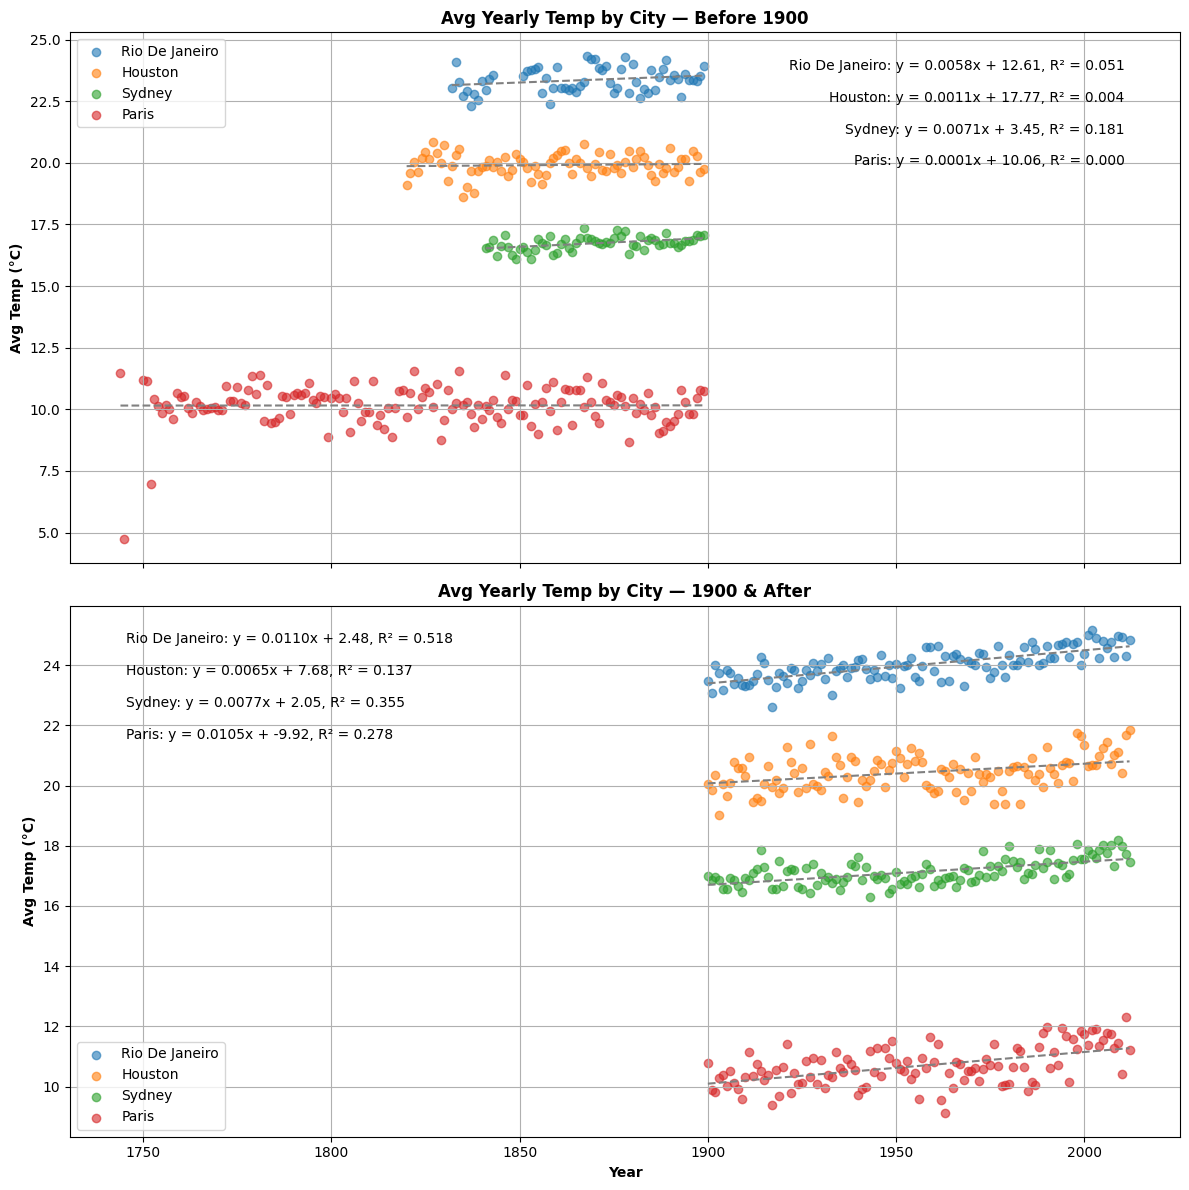

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Load your temperature data
file_path = "C:/Projects/Capstone/CO2-Emissions-and-Global-Temperature-Analysis/Data/Cleaned/Avg_Yearly_Temps.xlsx"
df = pd.read_excel(file_path)
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["AvgTemp"] = pd.to_numeric(df["AvgTemp"], errors="coerce")
df = df.dropna(subset=["Year", "AvgTemp"])

# Split into two timeframes
df1 = df[df["Year"] < 1900 ]
df2 = df[df["Year"] >= 1900]

# Define the custom order of cities
cities_order = ["Rio De Janeiro", "Houston", "Sydney", "Paris"]

fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

for ax, (label, subset, xpos, align) in zip(
    axes,
    [
        ("Before 1900", df1, 0.95, "right"),
        ("1900 & After", df2, 0.05, "left")
    ]
):
    y_text = 0.95  # start near the top
    for city in cities_order:
        city_df = subset[subset["City"] == city].sort_values("Year")
        x, y = city_df["Year"], city_df["AvgTemp"]
        if x.empty:
            continue

        ax.scatter(x, y, alpha=0.6, label=city)

        slope, intercept, r, *_ = linregress(x, y)
        ax.plot(x, intercept + slope * x, "--", color="gray")

        eq = f"{city}: y = {slope:.4f}x + {intercept:.2f}, R² = {r**2:.3f}"
        ax.text(
            xpos, y_text, eq,
            transform=ax.transAxes,
            horizontalalignment=align,
            verticalalignment="top",
            fontsize=10
        )
        y_text -= 0.06  # shift each line down

    ax.set_title(f"Avg Yearly Temp by City — {label}", fontweight="bold")
    ax.set_ylabel("Avg Temp (°C)", fontweight="bold")
    ax.grid(True)
    ax.legend()

axes[-1].set_xlabel("Year", fontweight="bold")
plt.tight_layout()
plt.show()



In [7]:
import scipy.sparse
import pygam.utils

# Force `.A` use to redirect to `.toarray()`
pygam.utils_old = pygam.utils.cholesky  # backup
def _cholesky_patched(A, sparse, verbose=False):
    import numpy as np
    from scipy import sparse as _sp
    if _sp.issparse(A):
        A = A.toarray()
    return pygam.utils_old(A, sparse=False, verbose=verbose)

pygam.utils.cholesky = _cholesky_patched

# Now import and use GAM
from pygam import LinearGAM, s

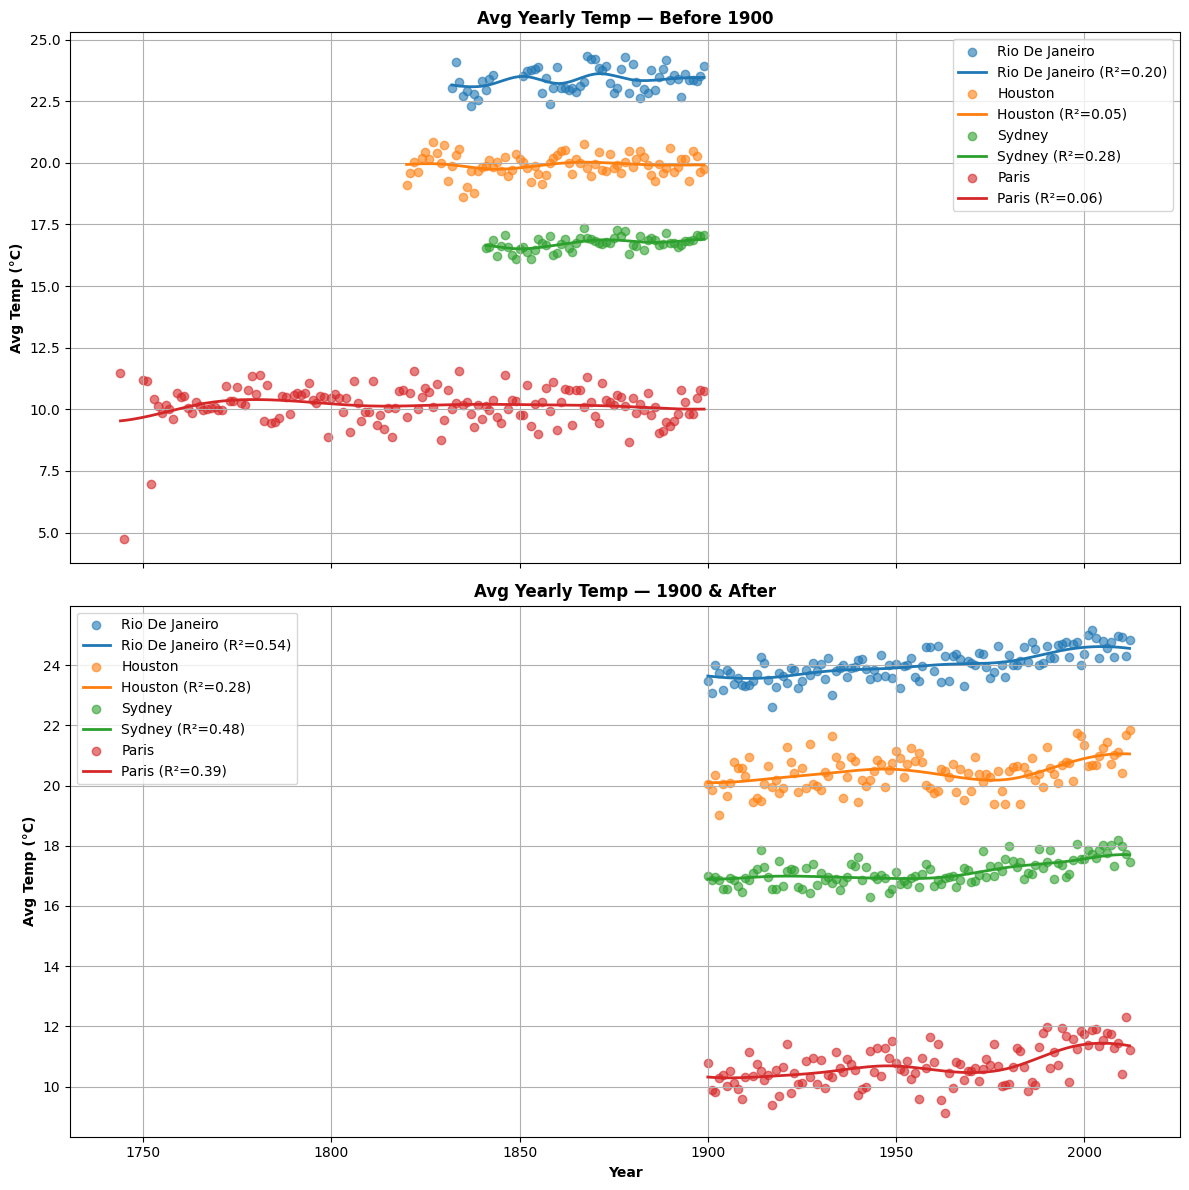

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import SplineTransformer
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Load your data
file_path = "C:/Projects/Capstone/CO2-Emissions-and-Global-Temperature-Analysis/Data/Cleaned/Avg_Yearly_Temps.xlsx"
df = pd.read_excel(file_path)
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["AvgTemp"] = pd.to_numeric(df["AvgTemp"], errors="coerce")
df = df.dropna(subset=["Year", "AvgTemp"])

# Split periods
df1 = df[df["Year"] < 1900]
df2 = df[df["Year"] >= 1900]

cities_order = ["Rio De Janeiro", "Houston", "Sydney", "Paris"]
fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

for ax, (label, subset) in zip(axes, [("Before 1900", df1), ("1900 & After", df2)]):
    for city in cities_order:
        city_df = subset[subset["City"] == city].sort_values("Year")
        if city_df.empty:
            continue

        X = city_df["Year"].values.reshape(-1,1)
        y = city_df["AvgTemp"].values

        # Pipeline: spline basis -> ridge regression
        model = make_pipeline(
            SplineTransformer(degree=3, n_knots=8, extrapolation="linear"),
            Ridge(alpha=1.0)
        )
        model.fit(X, y)

        # Predict on fine grid
        XX = np.linspace(X.min(), X.max(), 200).reshape(-1,1)
        YY = model.predict(XX)
        r2 = r2_score(y, model.predict(X))


        ax.scatter(X, y, alpha=0.6, label=city)
        ax.plot(XX, YY, '-', linewidth=2,
            label=f"{city} (R²={r2:.2f})")

    ax.set_title(f"Avg Yearly Temp — {label}", fontweight="bold")
    ax.set_ylabel("Avg Temp (°C)", fontweight="bold")
    ax.grid(True)
    ax.legend()

axes[-1].set_xlabel("Year", fontweight="bold")
plt.tight_layout()
plt.show()



Recent CO₂ emissions and cumulative:
 Year  Emissions  Cumulative_CO2
 2010  28.650000      806.125907
 2011  29.337449      835.463356
 2012  29.915907      865.379263
 2013  30.419210      895.798473
 2014  30.881195      926.679668
 2015  31.335698      958.015366
 2016  31.816556      989.831922
 2017  32.357606     1022.189527
 2018  32.992683     1055.182210
 2019  33.755624     1088.937834
 2020  34.680267     1123.618101
 2021  35.800446     1159.418547
 2022  37.150000     1196.568547
 2023  40.900000     1237.468547

Missing CO₂ rows in future_df:
Empty DataFrame
Columns: [Year, Cumulative_CO2]
Index: []

Model equations and R² scores:
Houston: Temp = -0.00146 * Year + 0.00132 * CO2 + 23.01731 | R² = 0.1921
Paris: Temp = 0.00252 * Year + 0.00138 * CO2 + 5.47361 | R² = 0.3391
Rio De Janeiro: Temp = 0.00734 * Year + 0.00061 * CO2 + 9.52002 | R² = 0.5302
Sydney: Temp = 0.00030 * Year + 0.00125 * CO2 + 16.27923 | R² = 0.4567


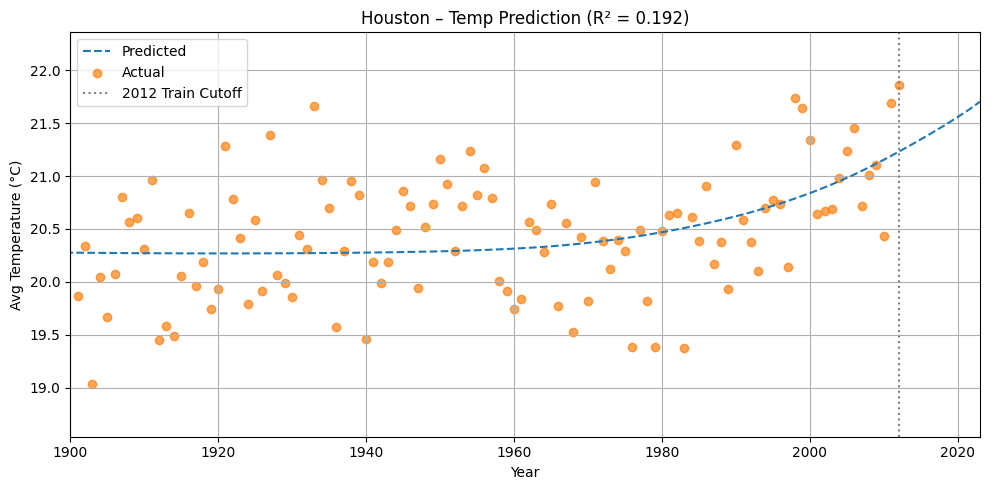

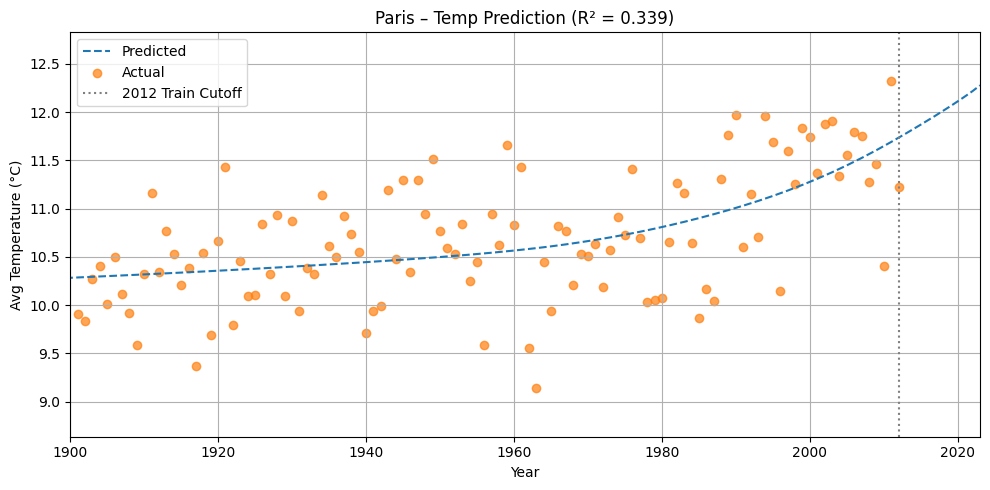

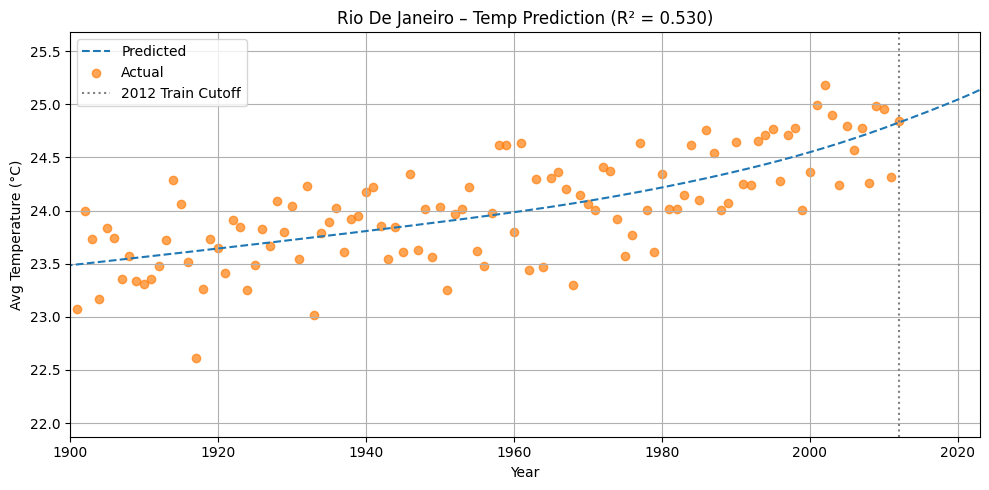

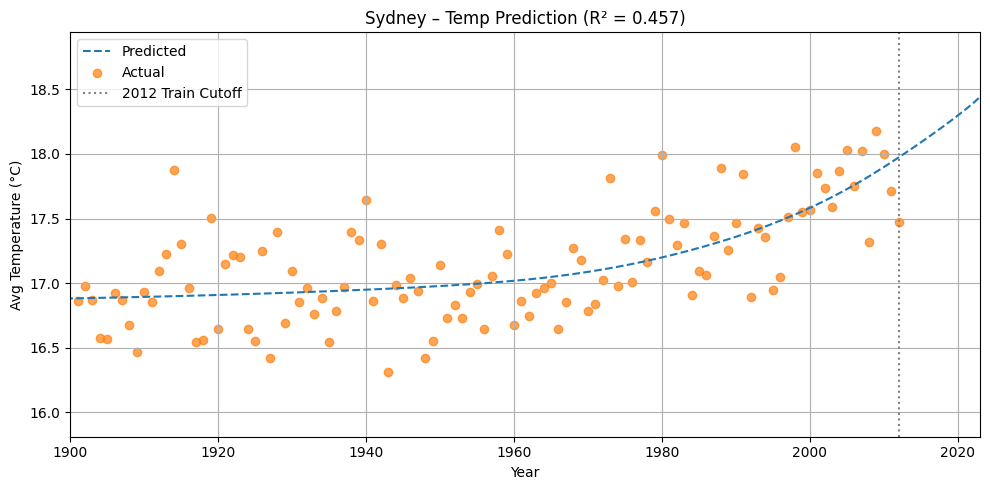


Extrapolated temperature predictions for 2020:
Houston: 21.56 °C
Paris: 12.11 °C
Rio De Janeiro: 25.04 °C
Sydney: 18.30 °C


In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from scipy.interpolate import PchipInterpolator

temp_path = "C:/Projects/Capstone/CO2-Emissions-and-Global-Temperature-Analysis/Data/Cleaned/Avg_Yearly_Temps.xlsx"
co2_path = "C:/Projects/Capstone/CO2-Emissions-and-Global-Temperature-Analysis/Data/Cleaned/GlobalCO2Emissions.xlsx"

temp_df = pd.read_excel(temp_path)
temp_df.columns = temp_df.columns.str.strip()

co2_df = pd.read_excel(co2_path)
co2_df.columns = co2_df.columns.str.strip()
co2_df = co2_df.sort_values('Year')

known_years = co2_df['Year']
known_emissions = co2_df['Emissions']
pchip = PchipInterpolator(known_years, known_emissions)

min_year = 1750
max_year = 2023
full_years = np.arange(min_year, max_year + 1)

interpolated_emissions = pchip(full_years)

co2_emissions_interp = pd.DataFrame({
    'Year': full_years,
    'Emissions': interpolated_emissions
})
co2_emissions_interp['Cumulative_CO2'] = co2_emissions_interp['Emissions'].cumsum()

print("\nRecent CO₂ emissions and cumulative:")
print(co2_emissions_interp[co2_emissions_interp['Year'] >= 2010][['Year', 'Emissions', 'Cumulative_CO2']].to_string(index=False))

temp_df = pd.merge(temp_df, co2_emissions_interp[['Year', 'Cumulative_CO2']], on='Year', how='left')
temp_df = temp_df.dropna(subset=['AvgTemp', 'Cumulative_CO2'])
temp_df = temp_df[temp_df['Year'] > 1900]

cities = temp_df['City'].unique()

future_df = pd.merge(
    pd.DataFrame({'Year': range(min_year, max_year + 1)}),
    co2_emissions_interp[['Year', 'Cumulative_CO2']],
    on='Year',
    how='left'
)

print("\nMissing CO₂ rows in future_df:")
print(future_df[future_df['Cumulative_CO2'].isna()])

models = {}
model_scores = {}
city_predictions = []

print("\nModel equations and R² scores:")
for city in cities:
    city_data = temp_df[temp_df['City'] == city]

    X = city_data[['Year', 'Cumulative_CO2']]
    y = city_data['AvgTemp']

    model = LinearRegression()
    model.fit(X, y)
    models[city] = model

    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    model_scores[city] = r2

    coef_year, coef_co2 = model.coef_
    intercept = model.intercept_
    print(f"{city}: Temp = {coef_year:.5f} * Year + {coef_co2:.5f} * CO2 + {intercept:.5f} | R² = {r2:.4f}")

    preds = model.predict(future_df[['Year', 'Cumulative_CO2']])

    city_pred_df = future_df.copy()
    city_pred_df['City'] = city
    city_pred_df['PredictedTemp'] = preds

    city_predictions.append(city_pred_df)

predictions_df = pd.concat(city_predictions, ignore_index=True)
actuals_df = temp_df[['Year', 'City', 'AvgTemp']]
results_df = pd.merge(predictions_df, actuals_df, on=['Year', 'City'], how='left')

for city in cities:
    city_result = results_df[results_df['City'] == city]
    r2 = model_scores[city]

    # Get min and max for Y-axis to fully show actual and predicted temps
    y_min = min(city_result['PredictedTemp'].min(), city_result['AvgTemp'].min())
    y_max = max(city_result['PredictedTemp'].max(), city_result['AvgTemp'].max())

    plt.figure(figsize=(10, 5))
    plt.plot(city_result['Year'], city_result['PredictedTemp'], label='Predicted', linestyle='--')
    plt.scatter(city_result['Year'], city_result['AvgTemp'], label='Actual', color='tab:orange', alpha=0.7)
    plt.axvline(x=2012, color='gray', linestyle=':', label='2012 Train Cutoff')
    plt.title(f'{city} – Temp Prediction (R² = {r2:.3f})')
    plt.xlabel('Year')
    plt.ylabel('Avg Temperature (°C)')
    plt.xlim(1900, max_year)
    plt.ylim(y_min - 0.5, y_max + 0.5)  # extra padding to fully show points
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def predict_temp(city, year, models, co2_model, base_emissions_df):
    last_known_year = base_emissions_df['Year'].max()
    base_total = base_emissions_df['Emissions'].sum()

    if year <= last_known_year:
        cumulative_co2 = base_emissions_df[base_emissions_df['Year'] <= year]['Emissions'].sum()
    else:
        extra_years = np.arange(last_known_year + 1, year + 1)
        projected_emissions = co2_model(extra_years)
        cumulative_co2 = base_total + projected_emissions.sum()

    model = models[city]
    return model.predict([[year, cumulative_co2]])[0]

print("\nExtrapolated temperature predictions for 2020:")
for city in cities:
    temp_2050 = predict_temp(city, 2020, models, pchip, co2_emissions_interp)
    print(f"{city}: {temp_2050:.2f} °C")




In [10]:
from sklearn.metrics import r2_score

models = {}
model_scores = {}  # NEW: store R² values
city_predictions = []

print("\nModel equations and R² scores:")
for city in cities:
    city_data = temp_df[temp_df['City'] == city]

    X = city_data[['Year', 'Cumulative_CO2']]
    y = city_data['AvgTemp']

    model = LinearRegression()
    model.fit(X, y)
    models[city] = model

    # Predict on training data for R²
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    model_scores[city] = r2  # Store it

    # Print equation + R²
    coef_year, coef_co2 = model.coef_
    intercept = model.intercept_
    print(f"{city}: Temp = {coef_year:.5f} * Year + {coef_co2:.5f} * CO2 + {intercept:.5f} | R² = {r2:.4f}")

    # Predict future temps
    preds = model.predict(future_df[['Year', 'Cumulative_CO2']])

    city_pred_df = future_df.copy()
    city_pred_df['City'] = city
    city_pred_df['PredictedTemp'] = preds

    city_predictions.append(city_pred_df)



Model equations and R² scores:
Houston: Temp = -0.00146 * Year + 0.00132 * CO2 + 23.01731 | R² = 0.1921
Paris: Temp = 0.00252 * Year + 0.00138 * CO2 + 5.47361 | R² = 0.3391
Rio De Janeiro: Temp = 0.00734 * Year + 0.00061 * CO2 + 9.52002 | R² = 0.5302
Sydney: Temp = 0.00030 * Year + 0.00125 * CO2 + 16.27923 | R² = 0.4567


In [11]:
from meteostat import Monthly
from datetime import datetime
import pandas as pd

def yearly_means(station_id, start, end):
    """Return a Pandas Series of yearly-mean temperatures (°C) for one station."""
    m = Monthly(station_id, start, end).fetch()          # monthly rows
    m = m.dropna(subset=['tavg'])                       # keep months that have a mean
    m['year'] = m.index.year
    return (m.groupby('year')['tavg']
             .mean()
             .rename(station_id))

start = datetime(2018, 1, 1)
end   = datetime(2022, 12, 31)

rio     = yearly_means('83746', start, end)
paris   = yearly_means('07156', start, end)
sydney  = yearly_means('94767', start, end)
houston = yearly_means('72243', start, end)

table = pd.concat([rio, paris, sydney, houston], axis=1)
table.columns = ['Rio (°C)', 'Paris (°C)', 'Sydney (°C)', 'Houston (°C)']
print(table.round(2))


      Rio (°C)  Paris (°C)  Sydney (°C)  Houston (°C)
year                                                 
2018      25.0       13.65        19.37         21.52
2019     25.12       13.37        19.72         21.67
2020     24.44       14.32        19.18         22.25
2021     24.08       12.48        18.52         21.73
2022      24.3       13.96        18.46         21.51
